## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [20]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [7]:
# 設定 data_path
dir_data = '../Data/Part01/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [26]:
# 根據小孩數分成不同組別 (小孩數區間 - 還款與否)
child_data = app_train[['TARGET', 'CNT_CHILDREN']] # subset
print(child_data.head()); print(child_data.max())

bin_cut = 4 #自 0 到 19個小孩，切 6 個點 (得到 5 組)
child_data['CHILDREN_BINNED'] = pd.cut(child_data['CNT_CHILDREN'], bins = bin_cut) 
print(child_data['CHILDREN_BINNED'].value_counts())

   TARGET  CNT_CHILDREN
0       1             0
1       0             0
2       0             0
3       0             0
4       0             0
TARGET           1
CNT_CHILDREN    19
dtype: int64
(-0.019, 4.75]    307385
(4.75, 9.5]          116
(9.5, 14.25]           8
(14.25, 19.0]          2
Name: CHILDREN_BINNED, dtype: int64


D:\Users\ryanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CategoricalIndex([(14.25, 19.0], (9.5, 14.25], (4.75, 9.5], (-0.019, 4.75]], categories=[(-0.019, 4.75], (4.75, 9.5], (9.5, 14.25], (14.25, 19.0]], ordered=True, dtype='category')


D:\Users\ryanl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Users\ryanl\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\Users\ryanl\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Users\ryanl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Users\ryanl\Anaconda3\lib\site-pack

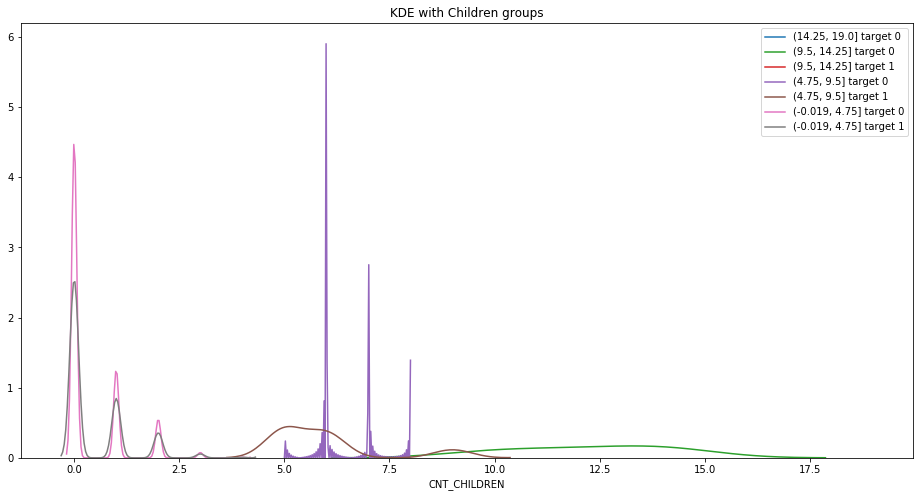

In [38]:
#還款能力越好，小孩數越多

child_group_sorted = child_data['CHILDREN_BINNED'].value_counts().index.sort_values(ascending=False)
print(child_group_sorted)
      
plt.figure(figsize=(16,8))
for i in range(len(child_group_sorted)):
#     plt.subplot(bin_cut-2,2,i+1)
    sns.distplot(child_data.loc[(child_data['CHILDREN_BINNED'] == child_group_sorted[i]) & \
                                (child_data['TARGET'] == 0), 'CNT_CHILDREN'], 
                 hist=False, label = str(child_group_sorted[i])+' target 0')
    
    sns.distplot(child_data.loc[(child_data['CHILDREN_BINNED'] == child_group_sorted[i]) & \
                                (child_data['TARGET'] == 1), 'CNT_CHILDREN'], 
                 hist=False, label = str(child_group_sorted[i])+' target 1')
    
plt.title('KDE with Children groups')
plt.show()

In [78]:
app_train.columns[0:100]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVIN

In [81]:
# 根據總收入分成不同組別 (總收入區間 - 還款與否)
income_data = app_train[['TARGET', 'AMT_INCOME_TOTAL']] # subset
print(income_data.head()); print(income_data.max())

bin_cut = 10 #切 11 個點 (得到 10 組)
income_data['INCOME_BINNED'] = pd.qcut(income_data['AMT_INCOME_TOTAL'], q = bin_cut) 
print(income_data['INCOME_BINNED'].value_counts())

   TARGET  AMT_INCOME_TOTAL
0       1          202500.0
1       0          270000.0
2       0           67500.0
3       0          135000.0
4       0          121500.0
TARGET                      1.0
AMT_INCOME_TOTAL    117000000.0
dtype: float64
(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: INCOME_BINNED, dtype: int64


D:\Users\ryanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CategoricalIndex([(270000.0, 117000000.0],    (225000.0, 270000.0],
                     (180000.0, 225000.0],    (162000.0, 180000.0],
                     (147150.0, 162000.0],    (135000.0, 147150.0],
                     (112500.0, 135000.0],     (99000.0, 112500.0],
                       (81000.0, 99000.0],    (25649.999, 81000.0]],
                 categories=[(25649.999, 81000.0], (81000.0, 99000.0], (99000.0, 112500.0], (112500.0, 135000.0], (135000.0, 147150.0], (147150.0, 162000.0], (162000.0, 180000.0], (180000.0, 225000.0], ...], ordered=True, dtype='category')


D:\Users\ryanl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


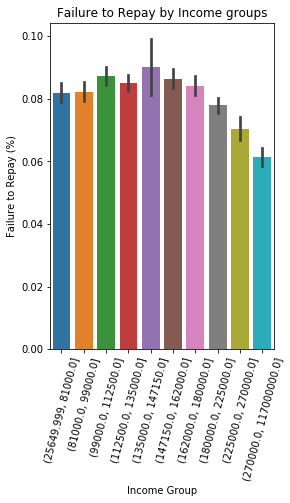

In [62]:
#收入在180000以上的還款能力越好，以下的還款能力差不多

income_group_sorted = income_data['INCOME_BINNED'].value_counts().index.sort_values(ascending=False)
print(income_group_sorted)
      
plt.figure(figsize=(4,6))

px = income_data['INCOME_BINNED']
py = income_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Income Group'); plt.ylabel('Failure to Repay (%)')

# for i in range(len(income_group_sorted)):
#     plt.subplot(bin_cut-2,2,i+1)
#     sns.distplot(income_data.loc[(income_data['INCOME_BINNED'] == income_group_sorted[i]) & \
#                                 (income_data['TARGET'] == 0), 'AMT_INCOME_TOTAL'], 
#                  hist=False, label = str(income_group_sorted[i])+' target 0')
    
#     sns.distplot(income_data.loc[(income_data['INCOME_BINNED'] == income_group_sorted[i]) & \
#                                 (income_data['TARGET'] == 1), 'AMT_INCOME_TOTAL'], 
#                  hist=False, label = str(income_group_sorted[i])+' target 1')
    
plt.title('Failure to Repay by Income groups')
plt.show()

In [79]:
# 根據貸款金額分成不同組別 (貸款金額區間 - 還款與否)
credit_data = app_train[['TARGET', 'AMT_CREDIT']] # subset
print(credit_data.head()); print(credit_data.max())

bin_cut = 10 #切 11 個點 (得到 10 組)
credit_data['CREDIT_BINNED'] = pd.qcut(credit_data['AMT_CREDIT'], q = bin_cut) 
print(credit_data['CREDIT_BINNED'].value_counts())

   TARGET  AMT_CREDIT
0       1    406597.5
1       0   1293502.5
2       0    135000.0
3       0    312682.5
4       0    513000.0
TARGET              1.0
AMT_CREDIT    4050000.0
dtype: float64
(604152.0, 755190.0]      34066
(44999.999, 180000.0]     33204
(180000.0, 254700.0]      31721
(432000.0, 513531.0]      30826
(513531.0, 604152.0]      30726
(306306.0, 432000.0]      30707
(1133748.0, 4050000.0]    30593
(755190.0, 900000.0]      29958
(900000.0, 1133748.0]     28319
(254700.0, 306306.0]      27391
Name: CREDIT_BINNED, dtype: int64


D:\Users\ryanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CategoricalIndex([(1133748.0, 4050000.0],  (900000.0, 1133748.0],
                    (755190.0, 900000.0],   (604152.0, 755190.0],
                    (513531.0, 604152.0],   (432000.0, 513531.0],
                    (306306.0, 432000.0],   (254700.0, 306306.0],
                    (180000.0, 254700.0],  (44999.999, 180000.0]],
                 categories=[(44999.999, 180000.0], (180000.0, 254700.0], (254700.0, 306306.0], (306306.0, 432000.0], (432000.0, 513531.0], (513531.0, 604152.0], (604152.0, 755190.0], (755190.0, 900000.0], ...], ordered=True, dtype='category')


D:\Users\ryanl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


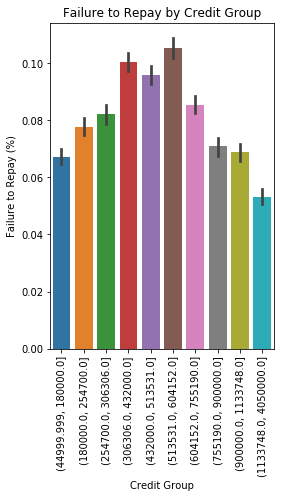

In [83]:
#借款300000~600000還款能力最差

credit_group_sorted = credit_data['CREDIT_BINNED'].value_counts().index.sort_values(ascending=False)
print(credit_group_sorted)
      
plt.figure(figsize=(4,6))

px = credit_data['CREDIT_BINNED']
py = credit_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 90); plt.xlabel('Credit Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Credit Group')
plt.show()